In [250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api

import re

### Funcoes Para ler os arquivos

In [227]:

#Le os arquivos do teste informado por parametro. Recebe como argumento o numero do teste assim como o tipo do teste :
#"parimpar ou SW"
def read_files(num_teste, tipo_teste):
    
    path1 = "../iperftestes/Saidas/Teste" + str(num_teste) + "/info_" + tipo_teste + ".txt"
    path2 = "../iperftestes/Saidas/Teste" + str(num_teste) + "/iperfs.txt"
    path3 = "../iperftestes/Saidas/Teste" + str(num_teste) + "/teste" + str(num_teste) + ".csv"
    
    df1 = pd.read_csv(path1, sep=" ")
    df2 = pd.read_csv(path2, sep="\t")
    df3 = pd.read_csv(path3)
    
    return df1, df2, df3


    
#Converte o arquivo ping?W para um dataframe de uma coluna so com o ping ! Retorna o dataframe gerado
def convert_ping(nome_arquivo, num_teste): 
    
    path = "../iperftestes/Saidas/Teste" + str(num_teste) + "/" + nome_arquivo + ".txt" #caminho do arquivo
    
    with open(path) as stream:#Abre o arquivo
    
        times = [] #lista que armazenara todos os pings para coloca-los posteriormente em um series->dataframe

        next(stream)  # Ignora a primeira linha do arquivo de entrada
        
        for line in stream: #Pega todas as linhas
            string = line.split(" ") #String eh uma lista com cada palavra da linha
            
            if(line != "Request timed out\n"): #Se a linha tiver o ping
            
                for i in range(0,len(string)): #Para cada palavra na lista string, procura "time"
                    if(re.match(r'time', string[i])): #Pega somente os valores numericos da palavra
                        time = re.findall(r'\d.+', string[i]) 
                        times.append(float(time[0])) #Transforma-os para float e coloca-os na lista times
        
        series = pd.Series(times) #Transforma a lista em uma Series
        ds = pd.DataFrame(series, columns=['Ping']) # E por fim em um dataframe

    return ds

# Método ParImpar (Análises)

In [262]:
df1, df2, df3 = read_files(10, "parimpar")
df4 = convert_ping("pingHW", 10)
df5 = convert_ping("pingSW", 10)

In [229]:
df1.head()

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados
0,13,SW,28,28,0,18721584
1,13,HW,22,22,0,15307488
2,23,HW,42,42,0,89062848
3,23,SW,48,48,0,104408136
4,33,HW,63,63,0,241986528


In [230]:
df2.head()

,Inicio(seg),Duracao(seg),Banda(Kbps),PCli,PServ
0,0.251040,78.275461,40.053267,18501,14001
1,0.314698,76.136369,1318.216400,18502,14002
2,0.361013,23.815972,2730.020501,18503,14003
3,1.127516,13.392282,2208.581846,18504,14004
4,1.546171,5.375085,1371.062812,18505,14005


In [231]:
df3.head()

,Timestamp,IpOri,PortaOri,IpDest,PortaDest,?,Tempo,BytesEnv,Banda(bps),Jitter,PctPerdido,PctEnv,%Perda,ForaOrdem
0,20191016105343,10.1.0.2,18505,10.1.0.1,14005,3,0.0-5.4,945210,1403890,NaN,NaN,NaN,NaN,NaN
1,20191016105343,10.1.0.1,14005,10.1.0.2,18505,3,0.0-5.4,942270,1405350,0.078,2.0,643.0,0.311,0.0
2,20191016105350,10.1.0.2,18504,10.1.0.1,14004,3,0.0-13.4,3786720,2260984,NaN,NaN,NaN,NaN,NaN
3,20191016105350,10.1.0.1,14004,10.1.0.2,18504,3,0.0-13.4,3785250,2261171,0.276,1.0,2576.0,0.039,0.0
4,20191016105352,10.1.0.2,18526,10.1.0.1,14026,3,0.0-9.1,4712820,4145133,NaN,NaN,NaN,NaN,NaN


In [232]:
df4.head()

,Ping
0,1.86
1,0.87
2,0.82
3,0.75
4,0.68


In [233]:
df5.head()

,Ping
0,2.46
1,1.26
2,0.58
3,0.57
4,0.58


### Pings (Referentes a HW e SW)

Text(0, 0.5, 'ping(ms)')

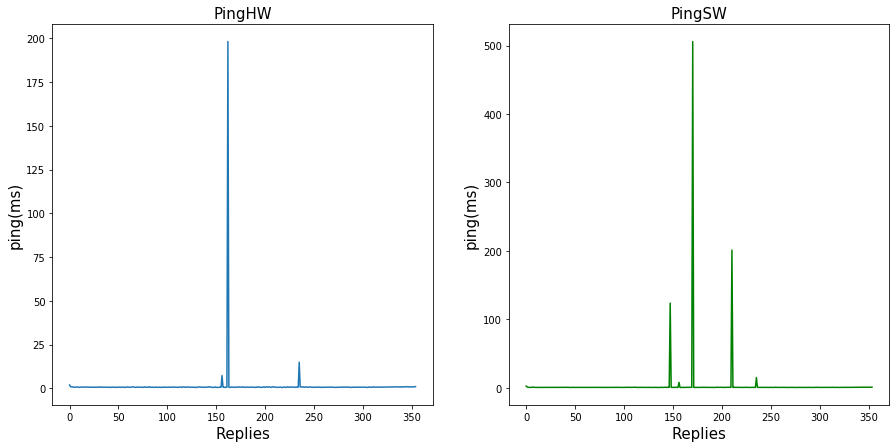

In [245]:
y = df4.Ping.to_numpy()
y2 = df5.Ping.to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("PingHW", fontsize=15)
ax1.set_xlabel('Replies', fontsize=15)
ax1.set_ylabel('ping(ms)', fontsize=15)
ax2.plot(y2, color='green', linestyle='-')
ax2.set_title("PingSW", fontsize=15)
ax2.set_xlabel('Replies', fontsize=15)
ax2.set_ylabel('ping(ms)', fontsize=15)


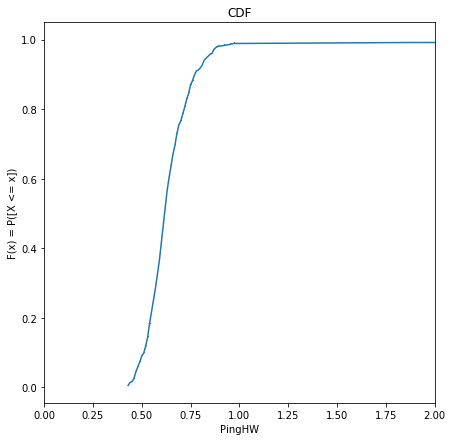

In [285]:
x1 = np.sort(df4['Ping']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('PingHW')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x1, y1, marker = ',')

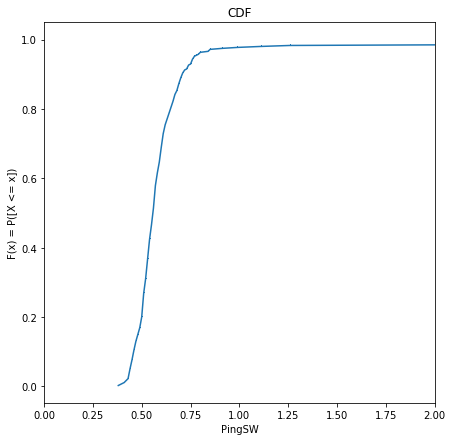

In [286]:
x2 = np.sort(df5['Ping']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x2)
y2 = func(x2)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('PingSW')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x2, y2, marker = ',')

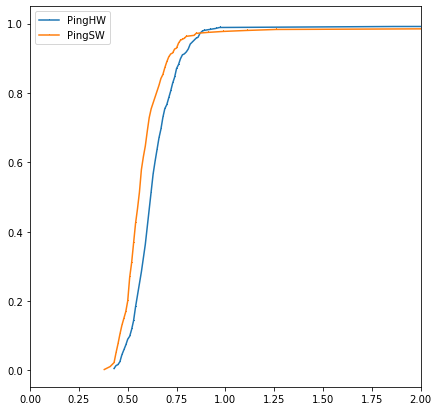

In [292]:
fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.plot(x1, y1, marker = ',', label='PingHW')
ax1.plot(x2, y2, marker = ',', label='PingSW')
ax1.set_xlim(0,2)
ax1.legend()


### Jitter

In [301]:
dfServer = df3[df3.IpOri == '10.1.0.1']


(0, 100)

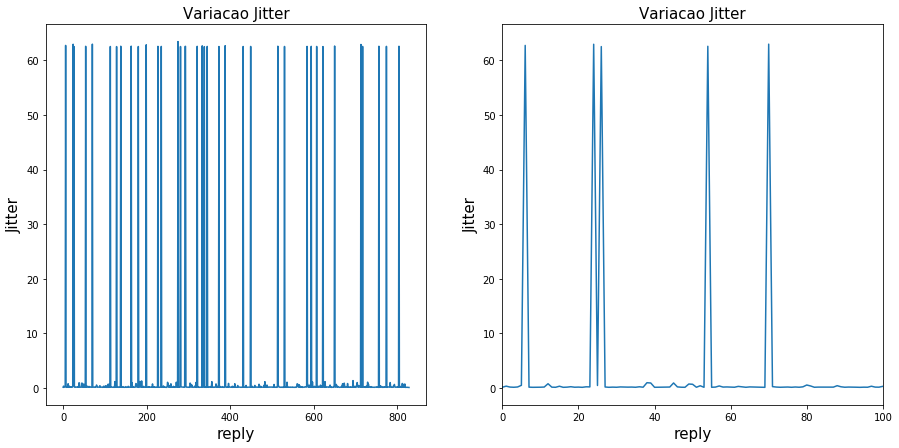

In [318]:
y = dfServer.Jitter.to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("Variacao Jitter", fontsize=15)
ax1.set_xlabel('reply', fontsize=15)
ax1.set_ylabel('Jitter', fontsize=15)

ax2.plot(y)
ax2.set_title("Variacao Jitter", fontsize=15)
ax2.set_xlabel('reply', fontsize=15)
ax2.set_ylabel('Jitter', fontsize=15)
ax2.set_xlim(0, 100)

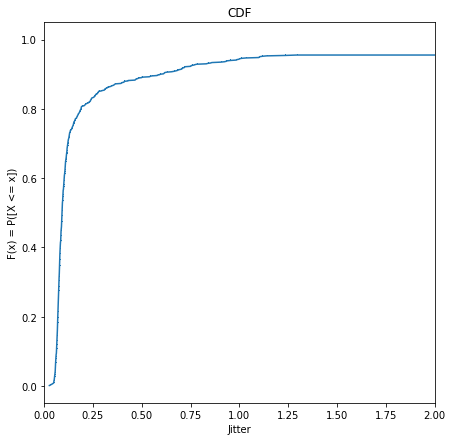

In [322]:
x1 = np.sort(dfServer['Jitter']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('Jitter')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x1, y1, marker = ',')

### % Perda de Pacotes

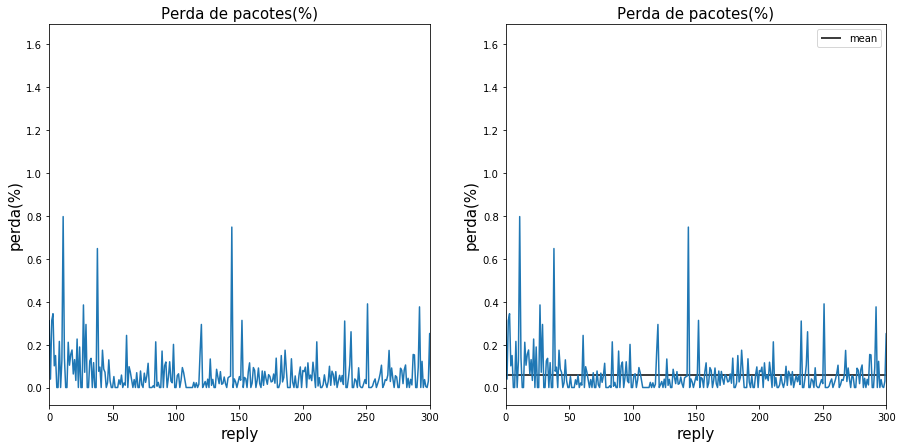

In [344]:
y = dfServer["%Perda"].to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("Perda de pacotes(%)", fontsize=15)
ax1.set_xlabel('reply', fontsize=15)
ax1.set_ylabel('perda(%)', fontsize=15)
ax1.set_xlim(0, 300)

ax2.hlines(dfServer["%Perda"].mean(), 0 ,300, label='mean')
ax2.plot(y)
ax2.set_title("Perda de pacotes(%)", fontsize=15)
ax2.set_xlabel('reply', fontsize=15)
ax2.set_ylabel('perda(%)', fontsize=15)
ax2.set_xlim(0, 300)
ax2.legend()


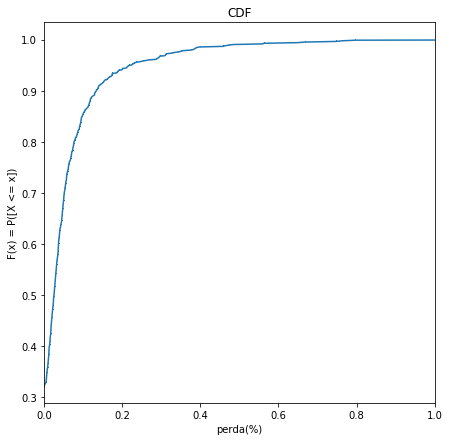

In [346]:
x1 = np.sort(dfServer['%Perda']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('perda(%)')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,1)
ax1.plot(x1, y1, marker = ',')

# Método SW (Análises)

In [347]:
df1, df2, df3 = read_files(9, "sw")
df4 = convert_ping("pingHW", 9)
df5 = convert_ping("pingSW", 9)

In [348]:
df1.head()

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,VezesBloqueado,BytesEnviados
0,11,HW,2,2,0,0
1,11,SW,19,19,0,5515776
2,16,HW,17,17,0,15525216
3,16,SW,50,50,0,5515776
4,21,HW,17,17,0,47727792


In [349]:
df2.head()

,Inicio(seg),Duracao(seg),Banda(Kbps),PCli,PServ
0,0.251040,78.275461,40.053267,18501,14001
1,0.314698,76.136369,1318.216400,18502,14002
2,0.361013,23.815972,2730.020501,18503,14003
3,1.127516,13.392282,2208.581846,18504,14004
4,1.546171,5.375085,1371.062812,18505,14005


In [350]:
df3.head()

,Timestamp,IpOri,PortaOri,IpDest,PortaDest,?,Tempo,BytesEnv,Banda(bps),Jitter,PctPerdido,PctEnv,%Perda,ForaOrdem
0,20191016104657,10.1.0.2,18505,10.1.0.1,14005,3,0.0-5.4,945210,1403891,NaN,NaN,NaN,NaN,NaN
1,20191016104658,10.1.0.1,14005,10.1.0.2,18505,3,0.0-5.4,940800,1402749,0.087,3.0,643.0,0.467,0.0
2,20191016104705,10.1.0.2,18504,10.1.0.1,14004,3,0.0-13.4,3786720,2260984,NaN,NaN,NaN,NaN,NaN
3,20191016104705,10.1.0.1,14004,10.1.0.2,18504,3,0.0-13.4,3782310,2261699,0.100,3.0,2576.0,0.116,0.0
4,20191016104706,10.1.0.2,18526,10.1.0.1,14026,3,0.0-9.1,4712820,4145131,NaN,NaN,NaN,NaN,NaN


In [351]:
df4.head()

,Ping
0,55.30
1,1.09
2,0.69
3,0.79
4,0.79


In [352]:
df5.head()

,Ping
0,55.11
1,1.19
2,0.65
3,0.54
4,0.65


### Pings (Referentes a HW e SW)

Text(0, 0.5, 'ping(ms)')

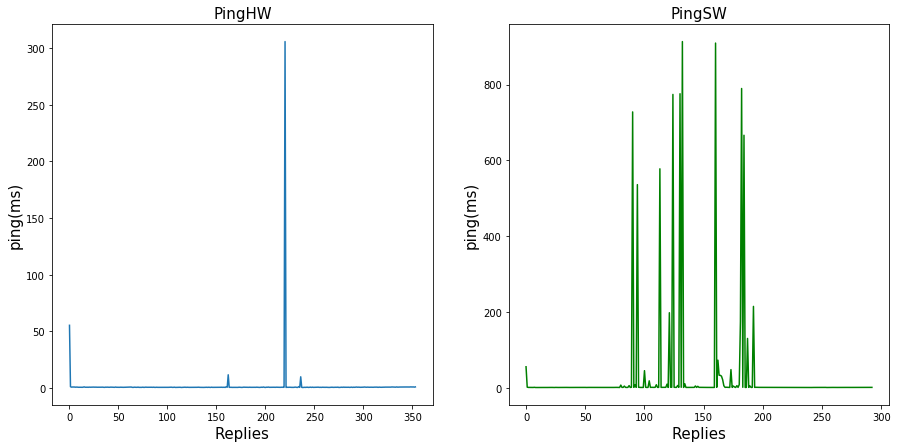

In [353]:
y = df4.Ping.to_numpy()
y2 = df5.Ping.to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("PingHW", fontsize=15)
ax1.set_xlabel('Replies', fontsize=15)
ax1.set_ylabel('ping(ms)', fontsize=15)
ax2.plot(y2, color='green', linestyle='-')
ax2.set_title("PingSW", fontsize=15)
ax2.set_xlabel('Replies', fontsize=15)
ax2.set_ylabel('ping(ms)', fontsize=15)


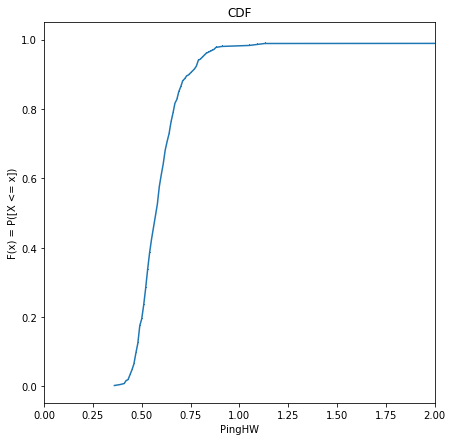

In [354]:
x1 = np.sort(df4['Ping']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('PingHW')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x1, y1, marker = ',')

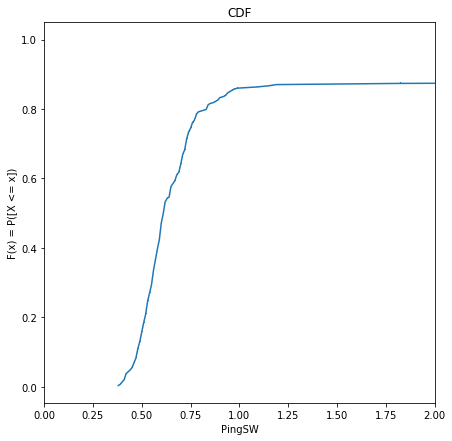

In [355]:
x2 = np.sort(df5['Ping']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x2)
y2 = func(x2)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('PingSW')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x2, y2, marker = ',')

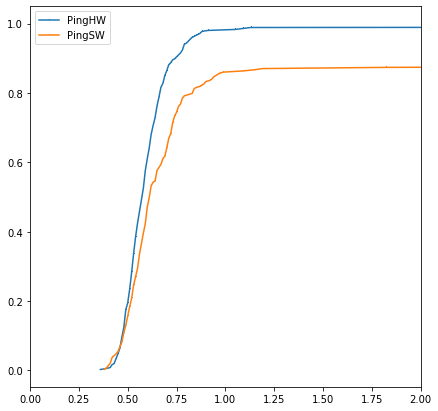

In [356]:
fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.plot(x1, y1, marker = ',', label='PingHW')
ax1.plot(x2, y2, marker = ',', label='PingSW')
ax1.set_xlim(0,2)
ax1.legend()


### Jitter

In [357]:
dfServer = df3[df3.IpOri == '10.1.0.1']

(0, 100)

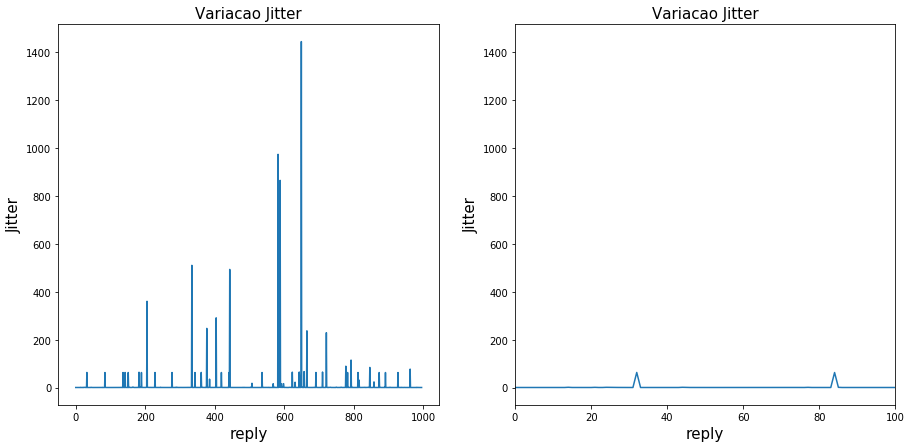

In [358]:
y = dfServer.Jitter.to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("Variacao Jitter", fontsize=15)
ax1.set_xlabel('reply', fontsize=15)
ax1.set_ylabel('Jitter', fontsize=15)

ax2.plot(y)
ax2.set_title("Variacao Jitter", fontsize=15)
ax2.set_xlabel('reply', fontsize=15)
ax2.set_ylabel('Jitter', fontsize=15)
ax2.set_xlim(0, 100)

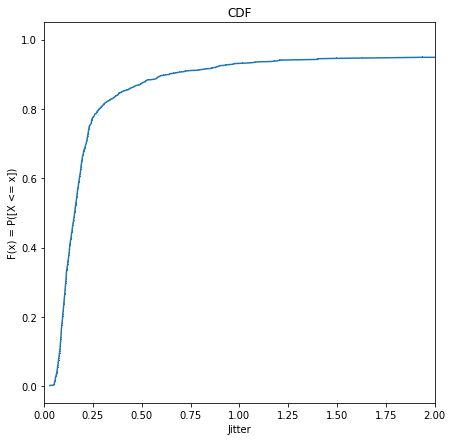

In [359]:
x1 = np.sort(dfServer['Jitter']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('Jitter')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,2)
ax1.plot(x1, y1, marker = ',')

### % Perda de Pacotes

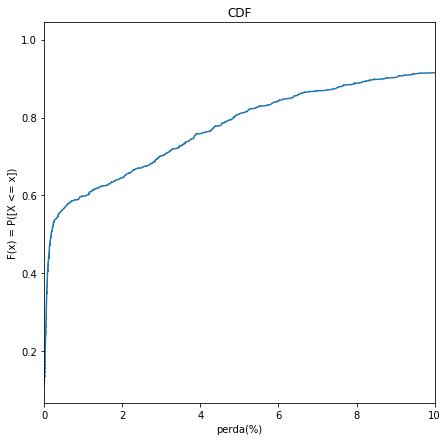

In [363]:
x1 = np.sort(dfServer['%Perda']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 

y1 = func(x1)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('perda(%)')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.set_xlim(0,10)
ax1.plot(x1, y1, marker = ',')




x2 = np.sort(dfServerParImpar['%Perda']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x2)
y2 = func(x2)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('perda(%)')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.plot(x1, y1, marker = ',', label='MetodoSW')
ax1.plot(x2, y2, marker = ',', label='MetodoParImpar')
ax1.set_xlim(0,0.5)
ax1.legend()

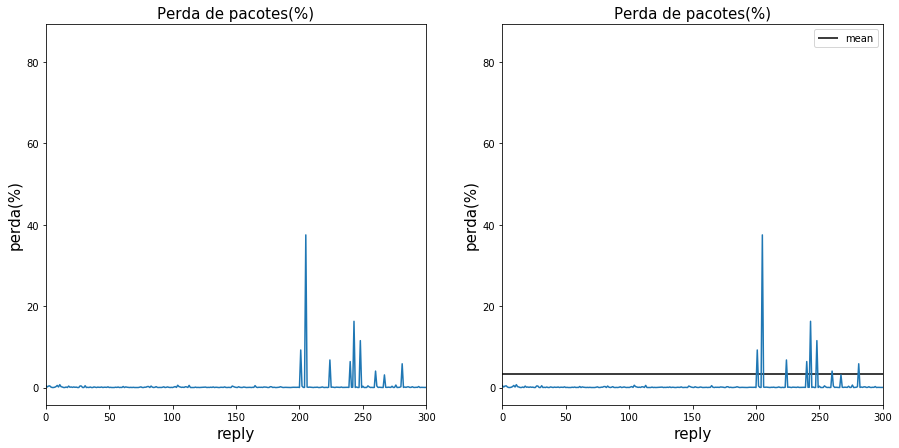

In [360]:
y = dfServer["%Perda"].to_numpy()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,7))

ax1.plot(y)
ax1.set_title("Perda de pacotes(%)", fontsize=15)
ax1.set_xlabel('reply', fontsize=15)
ax1.set_ylabel('perda(%)', fontsize=15)
ax1.set_xlim(0, 300)

ax2.hlines(dfServer["%Perda"].mean(), 0 ,300, label='mean')
ax2.plot(y)
ax2.set_title("Perda de pacotes(%)", fontsize=15)
ax2.set_xlabel('reply', fontsize=15)
ax2.set_ylabel('perda(%)', fontsize=15)
ax2.set_xlim(0, 300)
ax2.legend()


# Comparações entre os dois métodos

In [379]:
df1, df2, df3 = read_files(9, "sw")
df4, df5, df6 = read_files(10,"parimpar")

### % de Perda de Pacotes

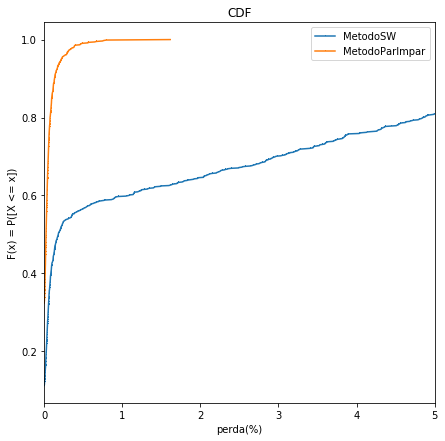

In [387]:
dfServerSW = df3[df3.IpOri == '10.1.0.1']
dfServerParImpar = df6[df6.IpOri == '10.1.0.1']

x1 = np.sort(dfServerSW['%Perda']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 
y1 = func(x1)

x2 = np.sort(dfServerParImpar['%Perda']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x2)
y2 = func(x2)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('perda(%)')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.plot(x1, y1, marker = ',', label='MetodoSW')
ax1.plot(x2, y2, marker = ',', label='MetodoParImpar')
ax1.set_xlim(0,5)
ax1.legend()


### Jitter

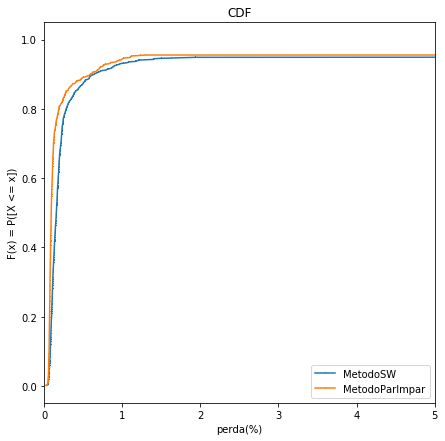

In [388]:

x1 = np.sort(dfServerSW['Jitter']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x1) 
y1 = func(x1)

x2 = np.sort(dfServerParImpar['Jitter']) 

func = statsmodels.api.distributions.empirical_distribution.ECDF(x2)
y2 = func(x2)

fig, ax1 = plt.subplots(1,1,figsize = (7,7))

ax1.set_title('CDF')
ax1.set_xlabel('perda(%)')
ax1.set_ylabel('F(x) = P([X <= x])')
ax1.plot(x1, y1, marker = ',', label='MetodoSW')
ax1.plot(x2, y2, marker = ',', label='MetodoParImpar')
ax1.set_xlim(0,5)
ax1.legend()